#Week 4: From Textual Information to Numerical Vector- part 2
**Before starting: If you using google Colab** run the code cell below

Mount google drive to colab.


In [0]:
#1.Mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"

**You need to download ckip model file. I put the ckip data in my 3 differnt google drive, in case 1 link fail, you can download from another link.**

In [0]:
# download ckip model file, it takes about 2-3 minutes, just download 1 time
ckipdata_id1="1-1BP2elKBkDwf37QF2-C2tzROAXZIa66"

def download_data_gdown(path,file_id):
    import gdown, os, zipfile, sys
    url = f"https://drive.google.com/uc?id={file_id}"
    data_zip = os.path.join(path, "data.zip")
    gdown.download(url, data_zip, quiet=False)
    
    with zipfile.ZipFile(data_zip, "r") as zip_ref:
        zip_ref.extractall(path)
    return
download_data_gdown(path=mydrive,file_id=ckipdata_id1)

**If you cannot download from the first google drive link, try the backup link (ckipdata_id2 or ckipdata_id3 below)**

In [0]:
ckipdata_id2="150BTuWcykYKdU6L5V3gEcECAfalAMuSY"
download_data_gdown(path=mydrive,file_id=ckipdata_id2)

In [0]:
ckipdata_id3="12mf66AlZ2Xq0JUGORflD1Ot4Pul2SNPg"
download_data_gdown(path=mydrive,file_id=ckipdata_id3)

#1. Part of Speech (POS) Tagging


**English POS using nltk package**

In [3]:
import nltk
text="National Tsing Hua University was established in Beijing in 1911 as “Tsing Hua Academy”. \
In 1956, National Tsing Hua University was re-established at its present location in Hsinchu, Taiwan. \
Since its relocation, NTHU has developed into a comprehensive research university offering a full range \
of degree programs in science, technology, engineering, humanities, social sciences, and management."
nltk.download('punkt')
text_tokens =nltk.word_tokenize(text)
print(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['National', 'Tsing', 'Hua', 'University', 'was', 'established', 'in', 'Beijing', 'in', '1911', 'as', '“', 'Tsing', 'Hua', 'Academy', '”', '.', 'In', '1956', ',', 'National', 'Tsing', 'Hua', 'University', 'was', 're-established', 'at', 'its', 'present', 'location', 'in', 'Hsinchu', ',', 'Taiwan', '.', 'Since', 'its', 'relocation', ',', 'NTHU', 'has', 'developed', 'into', 'a', 'comprehensive', 'research', 'university', 'offering', 'a', 'full', 'range', 'of', 'degree', 'programs', 'in', 'science', ',', 'technology', ',', 'engineering', ',', 'humanities', ',', 'social', 'sciences', ',', 'and', 'management', '.']


In [4]:
#averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
pos_tokens = nltk.pos_tag(text_tokens)
print(pos_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('National', 'NNP'), ('Tsing', 'NNP'), ('Hua', 'NNP'), ('University', 'NNP'), ('was', 'VBD'), ('established', 'VBN'), ('in', 'IN'), ('Beijing', 'NNP'), ('in', 'IN'), ('1911', 'CD'), ('as', 'IN'), ('“', 'JJ'), ('Tsing', 'NNP'), ('Hua', 'NNP'), ('Academy', 'NNP'), ('”', 'NNP'), ('.', '.'), ('In', 'IN'), ('1956', 'CD'), (',', ','), ('National', 'NNP'), ('Tsing', 'NNP'), ('Hua', 'NNP'), ('University', 'NNP'), ('was', 'VBD'), ('re-established', 'VBN'), ('at', 'IN'), ('its', 'PRP$'), ('present', 'JJ'), ('location', 'NN'), ('in', 'IN'), ('Hsinchu', 'NNP'), (',', ','), ('Taiwan', 'NNP'), ('.', '.'), ('Since', 'IN'), ('its', 'PRP$'), ('relocation', 'NN'), (',', ','), ('NTHU', 'NNP'), ('has', 'VBZ'), ('developed', 'VBN'), ('into', 'IN'), ('a', 'DT'), ('comprehensive', 'JJ'), ('research', 'NN'), ('university', 

In [5]:
nltk.download('universal_tagset')
pos_tokens_uni = nltk.pos_tag(text_tokens,tagset='universal')
print(pos_tokens_uni)

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[('National', 'NOUN'), ('Tsing', 'NOUN'), ('Hua', 'NOUN'), ('University', 'NOUN'), ('was', 'VERB'), ('established', 'VERB'), ('in', 'ADP'), ('Beijing', 'NOUN'), ('in', 'ADP'), ('1911', 'NUM'), ('as', 'ADP'), ('“', 'ADJ'), ('Tsing', 'NOUN'), ('Hua', 'NOUN'), ('Academy', 'NOUN'), ('”', 'NOUN'), ('.', '.'), ('In', 'ADP'), ('1956', 'NUM'), (',', '.'), ('National', 'NOUN'), ('Tsing', 'NOUN'), ('Hua', 'NOUN'), ('University', 'NOUN'), ('was', 'VERB'), ('re-established', 'VERB'), ('at', 'ADP'), ('its', 'PRON'), ('present', 'ADJ'), ('location', 'NOUN'), ('in', 'ADP'), ('Hsinchu', 'NOUN'), (',', '.'), ('Taiwan', 'NOUN'), ('.', '.'), ('Since', 'ADP'), ('its', 'PRON'), ('relocation', 'NOUN'), (',', '.'), ('NTHU', 'NOUN'), ('has', 'VERB'), ('developed', 'VERB'), ('into', 'ADP'), ('a', 'DET'), ('comprehensive', 'ADJ'), ('research', 'NOUN'), ('university', 'NOUN'), ('of

In [6]:
# Extract token withy POS = NOUN
noun_tokens =[] # create empty list 
for token in pos_tokens_uni:
    if token[1]=="NOUN":
      #print(token[0])
      noun_tokens+=[token[0]]
print(noun_tokens)


['National', 'Tsing', 'Hua', 'University', 'Beijing', 'Tsing', 'Hua', 'Academy', '”', 'National', 'Tsing', 'Hua', 'University', 'location', 'Hsinchu', 'Taiwan', 'relocation', 'NTHU', 'research', 'university', 'range', 'programs', 'science', 'technology', 'engineering', 'humanities', 'sciences', 'management']


**Using spacy package**


In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc_pos = nlp(text)
for token in doc_pos:
    print(token.text, token.tag_)

National NNP
Tsing NNP
Hua NNP
University NNP
was VBD
established VBN
in IN
Beijing NNP
in IN
1911 CD
as IN
“ ``
Tsing NNP
Hua NNP
Academy NNP
” ''
. .
In IN
1956 CD
, ,
National NNP
Tsing NNP
Hua NNP
University NNP
was VBD
re VBN
- VBN
established VBN
at IN
its PRP$
present JJ
location NN
in IN
Hsinchu NNP
, ,
Taiwan NNP
. .
Since IN
its PRP$
relocation NN
, ,
NTHU NNP
has VBZ
developed VBN
into IN
a DT
comprehensive JJ
research NN
university NN
offering VBG
a DT
full JJ
range NN
of IN
degree NN
programs NNS
in IN
science NN
, ,
technology NN
, ,
engineering NN
, ,
humanities NNS
, ,
social JJ
sciences NNS
, ,
and CC
management NN
. .


**Chinese POS using jieba package**

In [0]:
import jieba
chinese_text = "國立清華大學立校於中西文化激盪之際，不同學問的思辨，本土與國際的對話，滋養人才，學貫中西，貢獻人群，橫跨學術、藝術、文學、軍事、政治、經濟各領域，為本校傲人的傳統。學校歷經變遷，而弦歌不曾稍歇；於逆境中，自強以不息，於板蕩中，厚德以載物，是本校師生的精神與面貌，以迄於今。"

In [9]:
#Part of Speech Tagging
import jieba.posseg as pseg
pos_token = pseg.cut(chinese_text)
for w in pos_token:
    print('%s %s' % (w.word, w.flag))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.715 seconds.
Prefix dict has been built successfully.


國立清華大學 nt
立校 n
於 nr
中西文化 ns
激盪 v
之際 f
， x
不同 a
學問 n
的 uj
思辨 v
， x
本土 n
與 p
國際 n
的 uj
對話 n
， x
滋養 v
人才 n
， x
學貫 v
中西 ns
， x
貢獻 nr
人群 n
， x
橫 v
跨 v
學術 n
、 x
藝術 n
、 x
文學 n
、 x
軍事 n
、 x
政治 n
、 x
經濟 n
各 r
領域 n
， x
為 zg
本校 r
傲人 n
的 uj
傳統 n
。 x
學校 n
歷經 d
變遷 v
， x
而 c
弦歌 n
不曾 d
稍 d
歇 v
； x
於 nr
逆境 n
中 f
， x
自強 v
以 p
不息 v
， x
於 nr
板 ng
蕩 zg
中 f
， x
厚德 nz
以 p
載物 n
， x
是 v
本校 r
師生 nr
的 uj
精神 n
與 zg
面貌 n
， x
以 p
迄 v
於 nr
今 tg
。 x


In [11]:
#Part of Speech Tagging
cn_pos_tokens = pseg.cut(chinese_text)
#Extract noun token
noun_cntokens =[] # create empty list 
for token in cn_pos_tokens:
  #print(token.flag)
  if token.flag=="n":
    #print(token.word)
    noun_cntokens+=[token.word]
print(noun_cntokens)

['立校', '學問', '本土', '國際', '對話', '人才', '人群', '學術', '藝術', '文學', '軍事', '政治', '經濟', '領域', '傲人', '傳統', '學校', '弦歌', '逆境', '載物', '精神', '面貌']


# 2. Named Entity Recognition (NER)



In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
doc.ents # # .ents - entities

(National Tsing Hua University,
 Beijing,
 1911,
 Tsing Hua Academy,
 1956,
 National Tsing Hua University,
 Hsinchu,
 Taiwan,
 NTHU)

In [13]:
print([(X.text, X.label_) for X in doc.ents])

[('National Tsing Hua University', 'ORG'), ('Beijing', 'GPE'), ('1911', 'DATE'), ('Tsing Hua Academy', 'WORK_OF_ART'), ('1956', 'DATE'), ('National Tsing Hua University', 'ORG'), ('Hsinchu', 'GPE'), ('Taiwan', 'GPE'), ('NTHU', 'ORG')]


In [14]:
for ent in doc.ents:
    print(ent.text,':', ent.start_char, ent.end_char, ent.label_)

National Tsing Hua University : 0 29 ORG
Beijing : 49 56 GPE
1911 : 60 64 DATE
Tsing Hua Academy : 69 86 WORK_OF_ART
1956 : 92 96 DATE
National Tsing Hua University : 98 127 ORG
Hsinchu : 174 181 GPE
Taiwan : 183 189 GPE
NTHU : 213 217 ORG


In [15]:
from spacy import displacy
displacy.render(doc, jupyter=True, style='ent')

In [16]:
# define text
text2="A smartphone application capable of identifying medicines based on their appearance was unveiled May 7 by National Yang-Ming University in Taipei City.\
Designed for home care professionals, AIGIA can recognize around 400 commonly used drugs and provide detailed information on the pharmaceuticals in English,\
Indonesian, Malay and Vietnamese. It is designed to work in conjunction with MedBox, a mobile imaging device also created by the NYMU team for photographing medicines.\
According to the university, around 500,000 seniors in Taiwan have multiple chronic diseases and need to take several drugs every day. As many pills are similar in\
size and appearance, more than half of such elderly patients have reported mistakenly taking the wrong medication, NYMU said.\
Dr. Chen Yu-chun, an associate professor at the college and head of the R&D team, said that many patients in Taiwan discard external packaging and store pills\
in the same box, which can create difficulties for caregivers. The app provides a simple solution in case of uncertainty, with initial trials at Taipei Veterans\
General Hospital demonstrating that it has an accuracy rate of about 95 percent, he added"
doc2=nlp(text2)
displacy.render(doc2, jupyter=True, style='ent')


# NER Chinese

***Option 1, using chinese model for spacy, however, this model is still in alpha ralease**

In [17]:
#install wget if you not yet install wget
!pip install wget
#Download Chinese models for SpaCy
import wget
url = 'https://github.com/howl-anderson/Chinese_models_for_SpaCy/releases/download/v2.2.X-0.1.0/zh_core_web_sm-0.1.0.tar.gz'
wget.download(url, './')
# install Chinese models for SpaCy
!pip install zh_core_web_sm-0.1.0.tar.gz

Processing ./zh_core_web_sm-0.1.0.tar.gz
  Created wheel for zh-core-web-sm: filename=zh_core_web_sm-0.1.0-cp36-none-any.whl size=109433091 sha256=38da8d0da66c4c894a2bde12f1fb6ad488cb29e3d0428e9ecd78796e1e06e1bf
  Stored in directory: /root/.cache/pip/wheels/7e/9c/bc/4ab87db6d9b97d45279d34c3229946f9d11c05cbadd6af3ada
Successfully built zh-core-web-sm
  Found existing installation: zh-core-web-sm 0.1.0
    Uninstalling zh-core-web-sm-0.1.0:
      Successfully uninstalled zh-core-web-sm-0.1.0


In [0]:
chinese_text3="人民网北京3月20日电（杨乔栋）北京时间3月20日上午，东京奥运会圣火顺利抵达日本宫城县的航空自卫队松岛基地（Japan Air Self-Defense Force ），当地举行了简短的圣火迎接仪式。\
当地时间上午9点半，搭载圣火的“东京2020加油”号专机（TOKYO 2020 GO）降落在日本东北部宫城县松岛基地，三届奥运会柔道冠军野村忠宏和三届奥运摔跤冠军吉田沙保里登上舷梯，从机口接过火种灯，然后一起将灯交给在舷梯下等候的东京奥组委主席森喜朗。\
受新冠肺炎疫情的影响，原来计划的盛大欢迎仪式变成了只有少数人参加的简短仪式。另据了解，现场唯一保留的“节目”是飞行表演队在空中绘制奥运五环的环节。组委会在机场飞机旁搭起了简单的台子，上面放置了一个巨大的主火炬台，野村忠宏和吉田沙保里手持一支引燃的火炬，联合将主火炬台点燃。\
接下来，奥运火炬将在遭遇过2011年地震和海啸袭击的宫城、岩手和福岛三县作巡回展览。3月26日，东京奥组委将在福岛县的日本足球训练中心举行火炬接力开幕式，正式开始为期121天、遍及日本全国47个都道县的火炬接力。"

In [19]:
import zh_core_web_sm
nlp_cn = zh_core_web_sm.load()
doc_cn3 = nlp_cn(chinese_text3)
print(doc_cn3.ents)

(人民网, 北京, 3月, 杨乔栋, 北京, 3月, 东京, 日本, Japan Air, Defense Force, 上午9, 东京, 2020, TOKYO 2020, 日本, 宫城县, 野村忠宏, 吉田沙, 东京奥组委, 森喜朗, 组委会, 野村忠宏, 吉田沙, 2011年, 福岛, 3月26日, 东京, 福岛, 日本, 121天, 日本, 47)


In [20]:
print([(X.text, X.label_) for X in doc_cn3.ents])

[('人民网', 'ORG'), ('北京', 'GPE'), ('3月', 'DATE'), ('杨乔栋', 'PERSON'), ('北京', 'GPE'), ('3月', 'DATE'), ('东京', 'GPE'), ('日本', 'GPE'), ('Japan Air', 'ORG'), ('Defense Force', 'ORG'), ('上午9', 'DATE'), ('东京', 'GPE'), ('2020', 'DATE'), ('TOKYO 2020', 'DATE'), ('日本', 'GPE'), ('宫城县', 'GPE'), ('野村忠宏', 'PERSON'), ('吉田沙', 'PERSON'), ('东京奥组委', 'ORG'), ('森喜朗', 'PERSON'), ('组委会', 'ORG'), ('野村忠宏', 'PERSON'), ('吉田沙', 'PERSON'), ('2011年', 'DATE'), ('福岛', 'GPE'), ('3月26日', 'DATE'), ('东京', 'GPE'), ('福岛', 'GPE'), ('日本', 'GPE'), ('121天', 'DATE'), ('日本', 'GPE'), ('47', 'CARDINAL')]


In [21]:
from spacy import displacy
displacy.render(doc_cn3, jupyter=True, style='ent')

In [25]:
chinese_text2 = "面對新冠疫情與經濟寒潮的雙重打擊，數百萬美國人陷入了彷徨。\
            居住在首都華盛頓的美國人孫柯琳（Colleen O'Connor）在30歲生日前一天接到僱主的電話通知：她被解僱了。\
            解僱立即生效，她只剩30分鐘可登上公司郵箱保存資料，隨即趕到辦公室取回私人物品，與同事告別。\
            3月初，在畢生難忘的30歲生日那天，孫柯琳登記了失業。在3月21日這一周，跟她一樣首次申請失業救濟金的美國人接近330萬，創歷史新高。\
            孫柯琳原本在一家國際教育交流公司工作，主管中國項目。在中國疫情嚴峻時，她忙碌地協調學生撤離事項，同時隱約感覺到，如果疫情蔓延全球，將是對公司的致命一擊。\
            她的不詳預感不幸在兩個月後，成為了現實。疫情危機之下的美國和特朗普 口罩戴還是不戴 BBC駐美記者的糾結\
            新冠病毒疫情重創美國經濟，美股多次熔斷，出現斷崖式下跌；而就業市場則冰凍三尺，失業率的曲線猶如一座拔地而起的峭壁。\
            摩根士丹利預測，美國第二季度平均失業率將達到12.8%，那將是1940年代以來最高水平。而不到一個月前，美國失業率還在半個世紀以來最低點。\
            失業的高危行業包括住宿和餐飲服務業、交通、零售、娛樂、製造業等，影響約四分之一的美國勞工。"
doc_cn = nlp_cn(chinese_text2)
displacy.render(doc_cn, jupyter=True, style='ent')

#3. Word Cloud

In [0]:
# if you run in your local machine, you need to insstall wordcloud and matplotlib package
#!pip install wordcloud
#!pip install matplotlib

In [26]:
import nltk, re 
mydrive ="/content/drive/My Drive/Colab Notebooks/"
hamlet_text = open(mydrive+'gutenberg/shakespeare-hamlet.txt').read().lower()
nltk.download('punkt')
tokens = nltk.word_tokenize(hamlet_text)

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
print(filtered_tokens)
text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
print (text_draw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['tragedie', 'hamlet', 'william', 'shakespeare', '1599', 'actus', 'primus', 'scoena', 'prima', 'enter', 'barnardo', 'francisco', 'two', 'centinels', 'barnardo', 'fran', 'nay', 'answer', 'stand', 'vnfold', 'selfe', 'bar', 'long', 'liue', 'king', 'fran', 'barnardo', 'bar', 'fran', 'come', 'carefully', 'vpon', 'houre', 'bar', 'strook', 'twelue', 'get', 'thee', 'bed', 'francisco', 'fran', 'releefe', 'much', 'thankes', 'bitter', 'cold', 'sicke', 'heart', 'barn', 'haue', 'quiet', 'guard', 'fran', 'mouse', 'stirring', 'barn', 'well', 'goodnight', 'meet', 'horatio', 'marcellus', 'riuals', 'watch', 'bid', 'make', 'hast', 'enter', 'horatio', 'marcellus', 'fran', 'thinke', 'heare', 'stand', 'hor', 'friends', 'ground', 'mar', 'dane', 'fran', 'giue', 'good', 'night', 'mar'

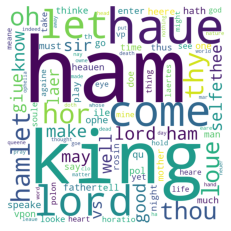

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white")
wc.generate(text_draw)
plt.axis('off')
plt.imshow(wc)
plt.show()

# save wordcloud
wc.to_file(mydrive+"wordcloud.jpg")